In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

n = 500 # размер выборки
np.random.seed(21)

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


#### 1. Для данных из файла employees.xls постройте гистограмму для переменной SALARY. Похоже ли распределение зарплат на нормальный закон? Проверьте нормальность с помощью изученных критериев.

In [2]:
# импортируем данные
data = pd.read_excel('../HW3_Data/employees.xls')
data.head()

,Unnamed: 0,GENDER,DEPART,EDUC,AGE,HEIGHT,SENIOR,SALARY,INI_PROF,CUR_PROF
0,Alexander,Female,Ship,College,22,63,4,23400,82,90
1,Arcones,Male,Package,College,49,65,17,40400,89,123
2,Barber,Male,Bake,College,36,67,8,29400,77,93
3,Barrera,Male,Package,HS,37,67,3,24800,102,108
4,Bester,Male,Ship,Grad,43,66,11,31200,82,104


In [3]:
# Разделим данные по условию задачи
sample1 = data[data['GENDER'] == 'Female']['SALARY']
sample2 = data[data['GENDER'] == 'Male']['SALARY']

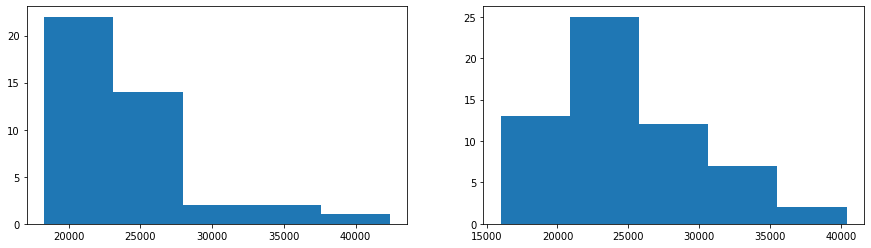

In [4]:
# посмотрим на гистограмму
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

ax1.hist(sample1, bins=5)
ax2.hist(sample2, bins=5)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


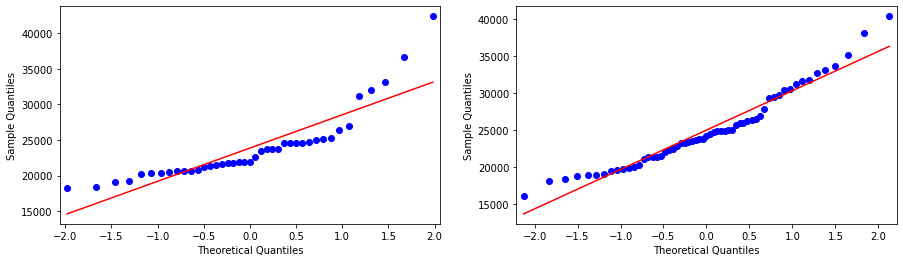

In [5]:
# посмотрим на qqplot
from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

qqplot(sample1, line='r', ax=ax1)
qqplot(sample2, line='r', ax=ax2)

plt.show()

Конечно, ни о какой нормальности в этих данный и не идет речь. Тем не менее попробуем применить критерий Стьюдента.

In [6]:
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-1.0761193318360134, pvalue=0.28451599063450816)

In [7]:
# запускаем критерий Шапиро-Уилка для sample1 и для sample2

print(stats.shapiro(sample1))
print(stats.shapiro(sample2))

ShapiroResult(statistic=0.7950240969657898, pvalue=4.30462841904955e-06)
ShapiroResult(statistic=0.9463528990745544, pvalue=0.011432561092078686)


In [8]:
# запускаем критерий Харке-Бера для sample1 и для sample2

print(stats.jarque_bera(sample1))
print(stats.jarque_bera(sample2))

Jarque_beraResult(statistic=52.888498373188014, pvalue=3.276490190273762e-12)
Jarque_beraResult(statistic=6.965817330563081, pvalue=0.030717932780094048)


#### 2. Методом перебора найдите наиболее подходящий тип распределения для выборки, содержащейся в файле sample.csv. Сначала постройте гистограмму, чтобы получить представление о форме плотности распределения. Затем изучите квантильные графики для разных распределений. Если будет такая возможность, попробуйте применить какие-то критерии согласия.

In [9]:
# импортируем данные
data = pd.read_csv('../HW3_Data/sample.csv')
data.shape

(100, 1)

In [10]:
sample = data['Sample']

In [11]:
sample1 = np.random.rand(n) # выборка 1 из равномерного распределения на [0,1]
sample2 = np.random.beta(2,2,size = n) # выборка 2 из бета-распределения с параметрами (2,2)

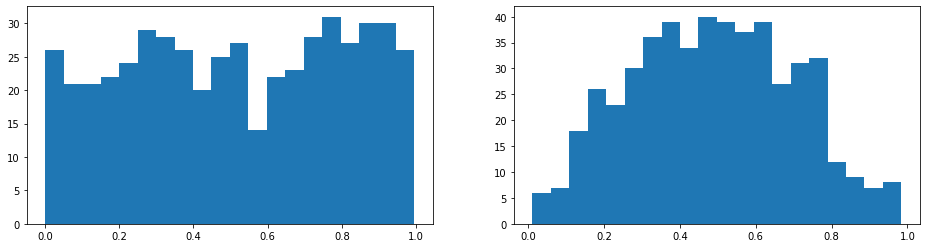

In [12]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

ax1.hist(sample1, bins=20)
ax2.hist(sample2, bins=20)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


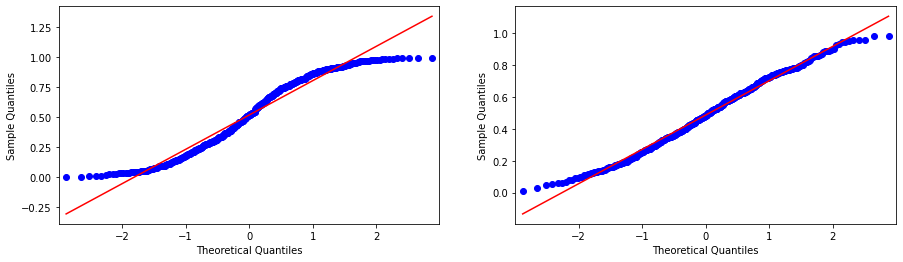

In [13]:
# посмотрим на qqplot

from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

qqplot(sample1, line='r', ax=ax1)
qqplot(sample2, line='r', ax=ax2)

plt.show()

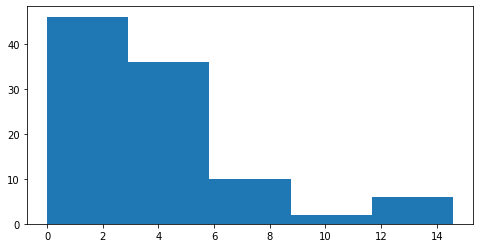

In [14]:
# посмотрим на гистограмму
fig, ax1 = plt.subplots(ncols=1, figsize=(8,4)) 

ax1.hist(sample, bins=5)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


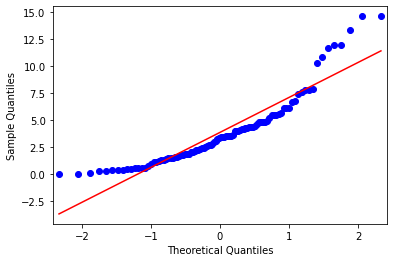

In [15]:
# посмотрим на qqplot

from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

qqplot(sample, line='s')
plt.show()

Распределение ненормальное

In [16]:
# проверяем гипотезу о том, что выборка взята из равномерного распределения на [0,1]
# Должны получить большой p-value (что будет означать, что значение статистики попало в область вероятных значений)
stats.kstest(sample, stats.uniform.cdf)

KstestResult(statistic=0.84, pvalue=1.1464745227715802e-79)

In [17]:
# проверяем гипотезу о том, что выборка взята из бета-распределения с параметрами (2,2)
stats.kstest(sample, stats.beta.cdf, args=(2,2))

KstestResult(statistic=0.84, pvalue=1.1464745227715802e-79)

In [18]:
data.Sample.value_counts().head()

1.819269    1
2.567554    1
1.686650    1
0.687877    1
5.464239    1
Name: Sample, dtype: int64

Применить критерии согласия Хи-квадрат не можем, так как нет частночти и распределения вероятностей.

In [19]:
# проверка нормальности
sample1 = np.random.normal(0,1, size=n) # выборка из нормального распределения
sample2 = np.random.beta(2,2,size = n) # выборка из бета-распределения с параметрами (2,2)


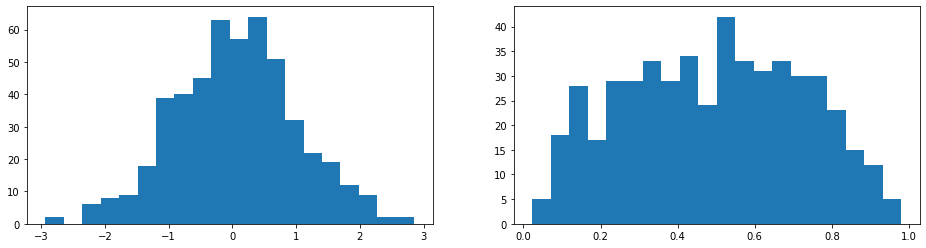

In [20]:
# нарисуем гистограммы 

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

ax1.hist(sample1, bins=20)
ax2.hist(sample2, bins=20)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


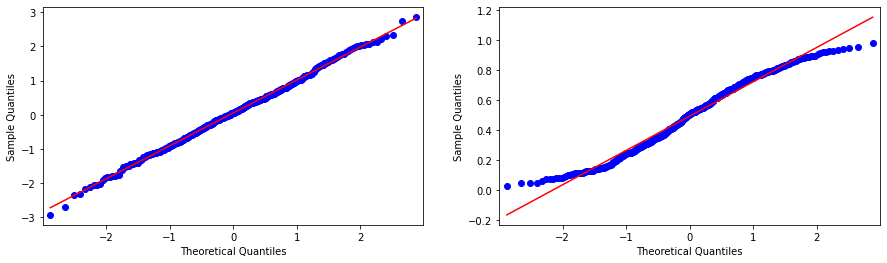

In [21]:
# посмотрим на qqplot

from statsmodels.graphics.gofplots import qqplot # импортируем функцию qqplot

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4)) 

qqplot(sample1, line='r', ax=ax1)
qqplot(sample2, line='r', ax=ax2)

plt.show()

In [22]:
# запускаем критерий Шапиро-Уилка

print(stats.shapiro(sample1))
print(stats.shapiro(sample2))

ShapiroResult(statistic=0.9985003471374512, pvalue=0.9500007629394531)
ShapiroResult(statistic=0.9764503240585327, pvalue=3.261163215029228e-07)


In [23]:
# запускаем критерий Харке-Бера

print(stats.jarque_bera(sample1))
print(stats.jarque_bera(sample2))

Jarque_beraResult(statistic=0.029767051850239593, pvalue=0.9852266862872586)
Jarque_beraResult(statistic=19.748796121995788, pvalue=5.147583616937901e-05)


#### 3. В файле anorexia.txt записан вес пациентов до начала терапии анорексии и после ее окончания. Была ли терапия в эффективна?

In [24]:
data = pd.read_csv("../HW3_Data/anorexia.txt", sep = "\t")

In [25]:
data['Before'] = data['Before'].apply(lambda x: float(str(x).strip('\n')))
data['After'] = data['After'].apply(lambda x: float(str(x).strip('\n')))
data.head()

,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


In [26]:
sample1 = data['Before']
sample2 = data['After']

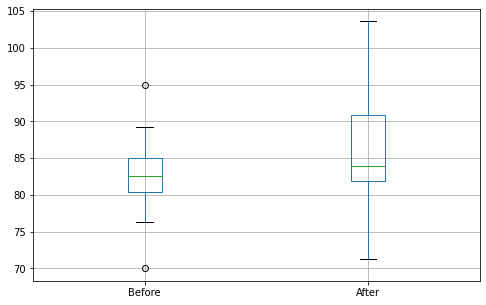

In [27]:
data.boxplot(figsize=(8,5))
plt.show()

После процедур  вес пациентов уыеличился. Также увеличился разброс данных.

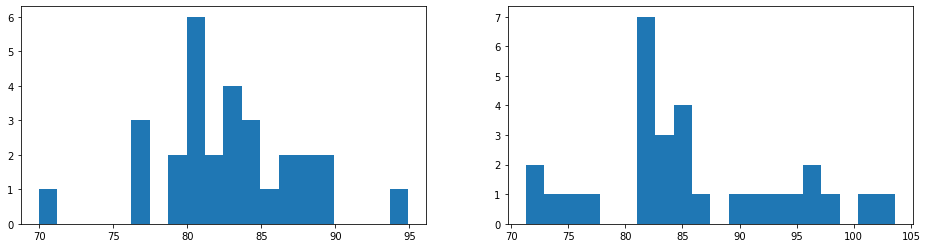

In [28]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

ax1.hist(sample1, bins=20)
ax2.hist(sample2, bins=20)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


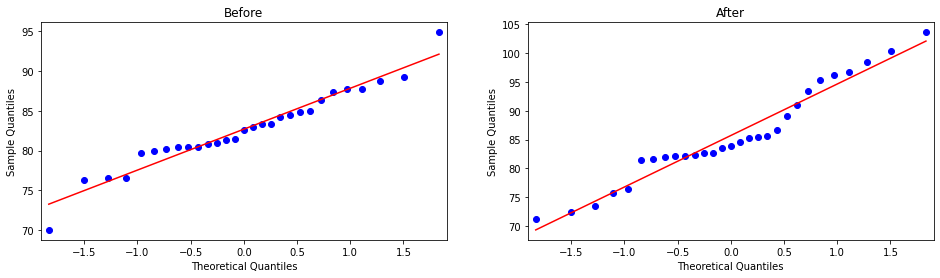

In [29]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

qqplot(sample1, line='r',ax=ax1)
ax1.set_title("Before")

qqplot(sample2, line='r',ax=ax2)
ax2.set_title("After")

plt.show()

In [30]:
# Критерий знаков
from statsmodels.stats.descriptivestats import sign_test
sign_test(sample1-sample2)

(-3.5, 0.26493089646101)

На уровне значимости 5% принимаем гипотезу

In [31]:
# Критерий знаковых рангов Уилкоксона
stats.wilcoxon(sample1,sample2)

WilcoxonResult(statistic=131.5, pvalue=0.06291972262602667)

Пограничное значение. Необходимо увеличить выборки и отвергнуть гипотезу.

Терапия оказалась эффективна, т к вес некоторых пациентов увеличился, однако медианный изменился незначительно.

#### 4. В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?

In [32]:
data = pd.read_csv("../HW3_Data/seattle.txt", sep = "\t")
data.head()

,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


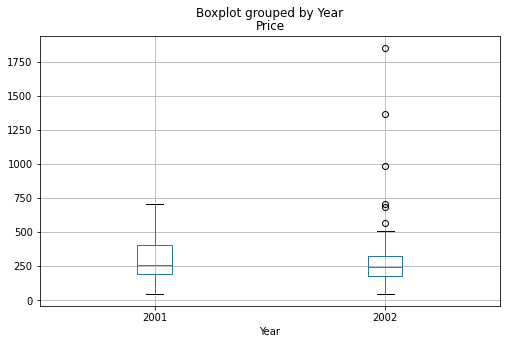

In [33]:
data.boxplot(column='Price', by='Year',figsize=(8,5))
plt.show()

In [34]:
sample1 = data[data['Year'] == 2001]['Price']
sample2 = data[data['Year'] == 2002]['Price']

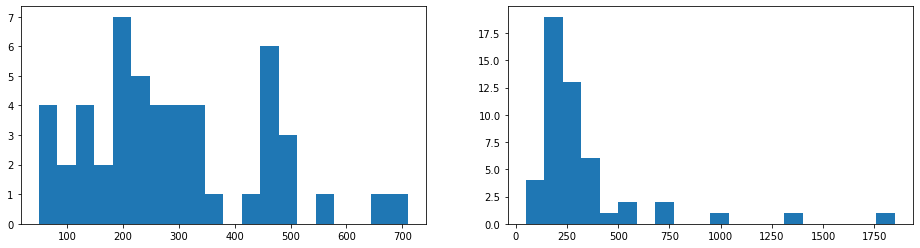

In [35]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

ax1.hist(sample1, bins=20)
ax2.hist(sample2, bins=20)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


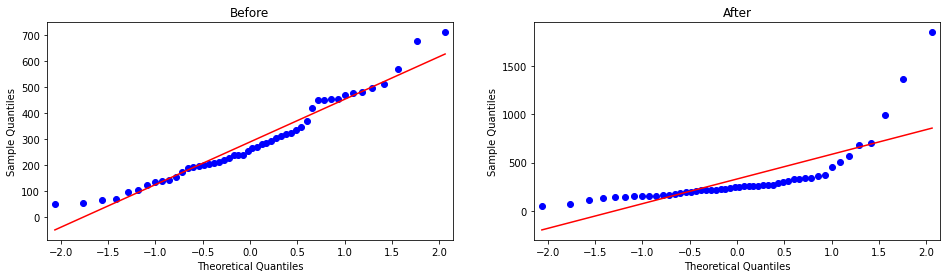

In [36]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

qqplot(sample1, line='r',ax=ax1)
ax1.set_title("Before")

qqplot(sample2, line='r',ax=ax2)
ax2.set_title("After")

plt.show()

In [37]:
# Критерий Колмогорова-Смирнова
stats.ks_2samp(sample1,sample2)

KstestResult(statistic=0.14, pvalue=0.7166468440414822)

Двусторонняя альтернатива показывает по p-value, что выборки однородны.

In [38]:
# Критерий Манна-Уитни
stats.mannwhitneyu(sample1,sample2, alternative='two-sided')

MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

Принимаем гипотезу. Потому что pvalue > 0.01

In [39]:
# Критерий Стьюдента (t-тест)
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42235167114691463)

Гипотеза о нормальности данных не выполняется

In [40]:
# проверим нормальность и с помощью критерия Шапиро-Уилка
stats.shapiro(sample1-sample2)

ShapiroResult(statistic=nan, pvalue=1.0)

In [41]:
# критерий Стьюдента
stats.ttest_rel(sample1, sample2)

Ttest_relResult(statistic=-0.9054576456583359, pvalue=0.369653808711352)

Критерий Стьюдента не подтверждает гипотезу о нормальности данных.

Медианное значение не изменилось, однако разброс цен недвижимости увеличился.

#### 5.В рамках исследования эффективности препарата метилфенидат пациенты с синдромом дефицита внимания и гиперактивности в течение недели принимали либо метилфенидат, либо плацебо. В конце недели каждый пациент проходили тест на способность к по давлению импульсивных поведенческих реакций. На втором этапе плацебо и препарат менялись, и после недельного курса каждый испытуемые проходили второй тест. Был ли эффект от применения препарата? Данные находятся в файле methylphenidate.txt.

In [121]:
data = pd.read_csv("../HW3_Data/methylphenidate.txt", sep = " ")
data.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [122]:
sample1 = data.Placebo
sample2 = data.Methylphenidate

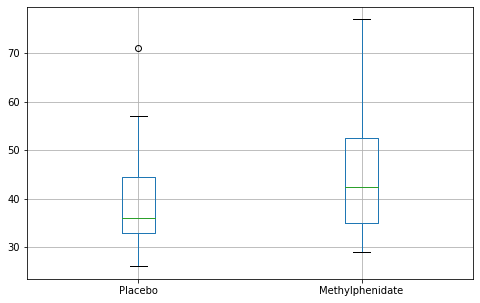

In [123]:
data.boxplot(figsize=(8,5))
plt.show()

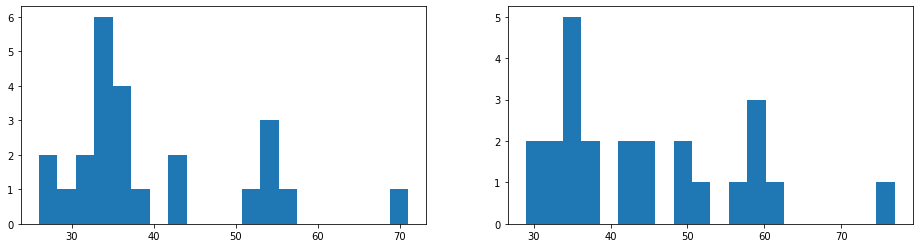

In [124]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

ax1.hist(sample1, bins=20)
ax2.hist(sample2, bins=20)

plt.show()

/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/a19028558/Desktop/transfer_accounts/akovyaz/learning_myself/env_school/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


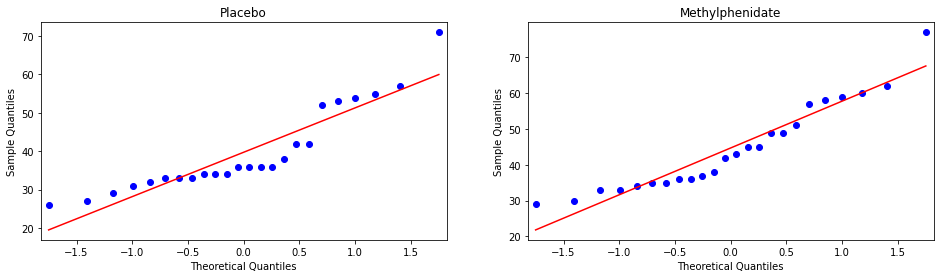

In [125]:
# давайте сначала посмотрим на гистограммы для sample1 и sample2

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(16,4)) 

qqplot(sample1, line='r',ax=ax1)
ax1.set_title("Placebo")

qqplot(sample2, line='r',ax=ax2)
ax2.set_title("Methylphenidate")

plt.show()

Мы видим эффект: медианное значение принимавших Methylphenidate подросло.

In [126]:
sample = np.array([[sample1, sample2]])
sample

array([[[57, 27, 32, 31, 34, 38, 71, 33, 34, 53, 36, 42, 26, 52, 36, 55,
         36, 42, 36, 54, 34, 29, 33, 33],
        [62, 49, 30, 34, 38, 36, 77, 51, 45, 42, 43, 57, 36, 58, 35, 60,
         33, 49, 33, 59, 35, 37, 45, 29]]])

In [130]:
stats.chi2_contingency(sample, correction=False)


(16.20675639031168,
 0.8462758394957708,
 23,
 array([[[56.00690676, 35.76911692, 29.18006907, 30.59200789,
          33.88653182, 34.82782437, 69.65564874, 39.53428712,
          37.18105575, 44.71139615, 37.18105575, 46.59398125,
          29.18006907, 51.77109028, 33.41588555, 54.12432166,
          32.47459299, 42.82881105, 32.47459299, 53.18302911,
          32.47459299, 31.06265417, 36.71040947, 29.18006907],
         [62.99309324, 40.23088308, 32.81993093, 34.40799211,
          38.11346818, 39.17217563, 78.34435126, 44.46571288,
          41.81894425, 50.28860385, 41.81894425, 52.40601875,
          32.81993093, 58.22890972, 37.58411445, 60.87567834,
          36.52540701, 48.17118895, 36.52540701, 59.81697089,
          36.52540701, 34.93734583, 41.28959053, 32.81993093]]]))

Критерий хи-квадрат признал различие значимым на уровне  ≈ 85%.

#### 6. В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). Влияет ли тип двигателя на расход топлива? А тип коробки передач?

In [48]:
data = pd.read_csv("../HW3_Data/mtcars.csv", sep = ",")
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


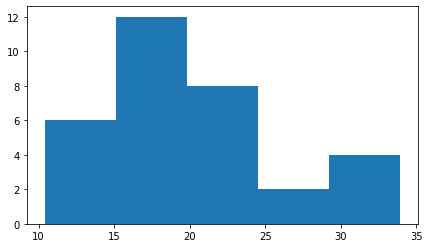

In [93]:

# для количественных признаков выведем матрицу диаграмм рассеяния

data["mpg"].hist(figsize=(7,4), grid=False, bins = 5)
plt.show()

In [56]:
# а для бинарных признаков просто оценим сбалансированность

print("Тип двигателя")
print(data.vs.value_counts())
print("Тип коробки")
print(data.am.value_counts())

Тип двигателя
0    18
1    14
Name: vs, dtype: int64
Тип коробки
0    19
1    13
Name: am, dtype: int64


In [88]:
# подготовим данные
df = data[data["mpg"].apply(lambda x: True if x < 30 else False)]

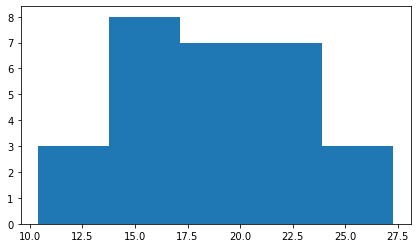

In [91]:
df["mpg"].hist(figsize=(7,4), grid=False, bins = 5)
plt.show()

In [99]:
# коэффициент корреляции Пирсона
# расход топлива и тип двигателя

stats.pearsonr(df["mpg"],df['vs'])

(0.5769031287806731, 0.001309978309428573)

In [95]:
# коэффициент корреляции Спирмена
# расход топлива и тип двигателя

stats.spearmanr(df["mpg"],df['vs'])

SpearmanrResult(correlation=0.6233530933165956, pvalue=0.00039466906715972445)

In [101]:
# коэффициент корреляции Кендалла
# расход топлива и тип двигателя

stats.kendalltau(df["mpg"],df['vs'])

KendalltauResult(correlation=0.5217062577301893, pvalue=0.0011993372540941214)

Значение коэффициента корреляции больше 0.5. По значению pvalue отвергаем гипотезу, что коэффициент корреляции равен 0 на уровне значимости 5%
Расход топлива и тип двигателя положительно коррелированы.

In [102]:
# коэффициент корреляции Пирсона
# расход топлива и тип коробки передач

stats.pearsonr(df["mpg"],df['am'])

(0.44105444620800094, 0.018806996170999752)

In [103]:
# коэффициент корреляции Спирмена
# расход топлива и тип коробки передач

stats.spearmanr(df["mpg"],df['am'])

SpearmanrResult(correlation=0.4121523689776928, pvalue=0.029302525093091544)

In [104]:
# коэффициент корреляции Кендалла
# расход топлива и тип коробки передач

stats.kendalltau(df["mpg"],df['am'])

KendalltauResult(correlation=0.3449448993506097, pvalue=0.03222515778130683)

Значение коэффициента корреляции меньше 0.5 По значению pvalue отвергаем гипотезу, что коэффициент корреляции равен 0 на уровне значимости 5%
Расход топлива и тип коробки передач положительно коррелированы, но коэффициент корреляции ниже чем у расход топлива и тип двигателя.